# Cruise Control: PID Controller Design



# System model and parameters

The transfer function model for the cruise control problem is given below.  Please see the [Cruise Control: System Modeling](../CruiseControl/CruiseControl-SystemModeling.ipynb) page for the derivation. 

$$
 P(s) = \frac{V(s)}{U(s)} = \frac{1}{ms+b} \qquad  [ \frac{m/s}{N} ] 
$$

 The parameters used in this example are as follows: (m)   vehicle mass            1000 kg (b)   damping coefficient     50 N.s/m (r)   reference speed         10 m/s 

# Performance specifications


* Rise time < 5 s 
* Overshoot < 10 
* Steady-state error < 2 

# PID overview

The block diagram of a typical unity feedback system is shown below. 
![feedback_cruise.png](figures/feedback_cruise.png)
 Recall from the [Introduction: PID Controller Design](../Introduction/Introduction-ControlPID.ipynb) page, the transfer function of a PID controller is 

$$
 C(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 +K_p s + K_i}{s} 
$$

 We can define a PID controller in MATLAB using the transfer function directly:

In [1]:
import control
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate Larger more readable plots
sns.set(
    rc={
        "axes.labelsize": 8,
        "axes.titlesize": 8,
        "figure.figsize": (4 * 1.618, 4),
        "figure.dpi": 200,
    }
)

In [2]:
Kp = 1
Ki = 1
Kd = 1
s = control.TransferFunction.s
C = Kp + Ki/s + Kd*s
C

TransferFunction(array([1, 1, 1]), array([1, 0]))

## Proportional control

The first thing to do in this problem is to find a closed-loop transfer function with a proportional control ($C = K_p$) added. By reducing the unity feedback block diagram, the closed-loop transfer function with a proportional controller becomes: 

$$
 T(s) = \frac{Y(s)}{R(s)} = \frac{P(s)C(s)}{1+P(s)C(s)} = \frac{K_p}{m s+b+K_p} 
$$

 Recall from the [Introduction: PID Controller Design](../Introduction/Introduction-ControlPID.ipynb) page, a proportional controller, $K_p$, decreases the rise time, which is desirable in this case. For now, use $K_p$equal to 100 and a reference speed of 10 m/s. Create a new [m-file](../Extras_Mfile.ipynb) and enter the following commands.

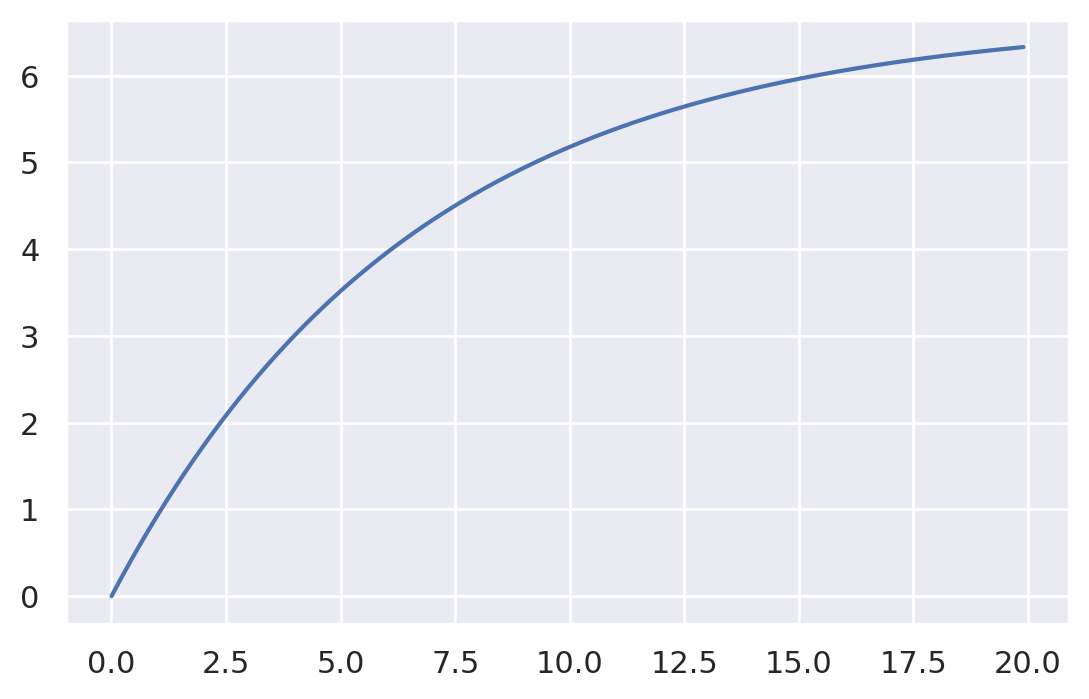

In [3]:
m = 1000
b = 50
r = 10
P_cruise = 1/(m*s + b);
Kp = 100;
# Proportional Controller.
C = Kp
T = control.feedback(C*P_cruise,1)
t = np.arange(0,20,0.1)
T, yout = control.step_response(sys=r*T, T=t)
plt.plot(T,yout)
plt.grid('on')

Note that we have used the `control.feedback` command to simplify the block diagram reduction of the closed-loop system.  Please verify for yourself that the result agrees with the closed-loop transfer function, T, derived above

As you can see from the plot, neither the steady-state error nor the rise time satisfy our design criteria. You can increase the proportional gain, $K_p$, to reduce the rise time and the steady-state error. Change $K_p$ so that it equals 5000 and rerun it in. You should see the following plot.

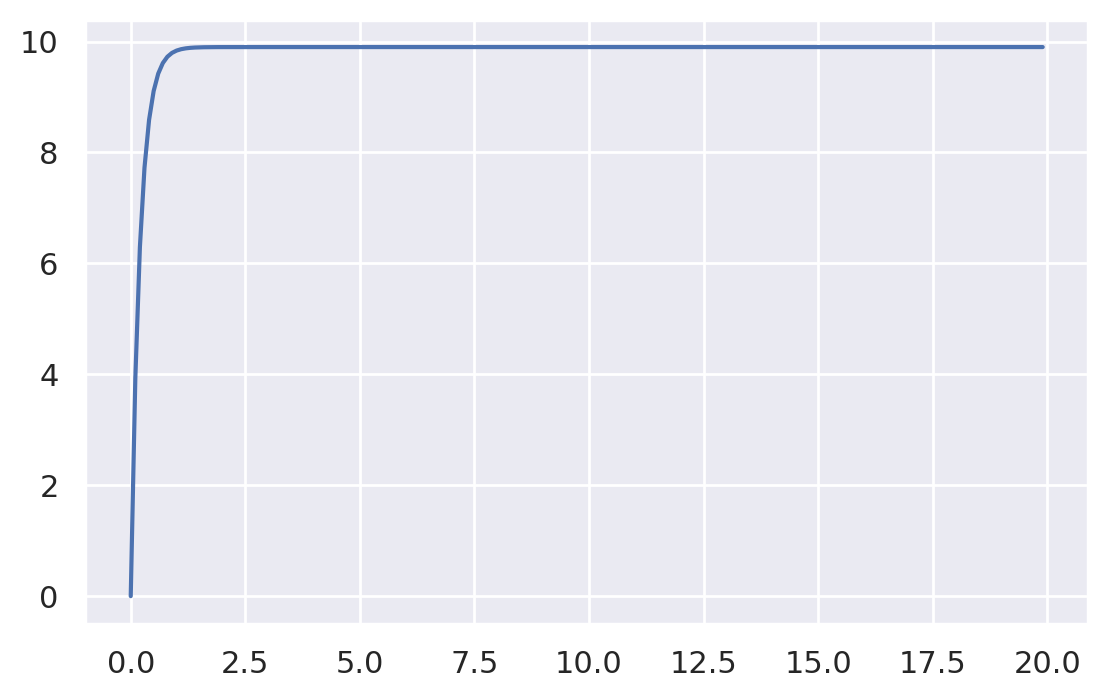

In [4]:
Kp = 5000
C = Kp
T = control.feedback(C*P_cruise,1)
t = np.arange(0,20,0.1)
T, yout = control.step_response(sys=r*T, T=t)
plt.plot(T,yout)
plt.grid('on')

The steady-state error is now essentially zero, and the rise time has been reduced substantially. However, this response is unrealistic because a real cruise control system generally can not change the speed of the vehicle from 0 to 10 m/s in less than 0.5 seconds due to power limitations of the engine and drivetrain.

**Actuator limitations** are very frequently encountered in practice in control systems engineering, and consequently, the required control action must always be considered when proposing a new controller. We will discuss this issue much more in subsequent tutorials. 

The solution to this problem in this case is to choose a lower proportional gain, $K_p$, that will give a reasonable rise time, and add an integral controller to eliminate the steady-state error. 

# PI control

The closed-loop transfer function of this cruise control system with a PI controller ($C = K_p + K_i/s$) is: 

$$
 T(s) = \frac{Y(s)}{R(s)} = \frac{P(s)C(s)}{1+P(s)C(s)} = \frac{K_p s + K_i}{m s^2+(b+K_p)s + K_i} 
$$

 Recall from the [Introduction: PID Controller Design](../Introduction/Introduction-ControlPID.ipynb) page, an addition of an integral controller to the system eliminates the steady-state error. For now, let $K_p$equal 600 and $K_i$equal 1 and see what happens to the response. Change your m-file to the following.

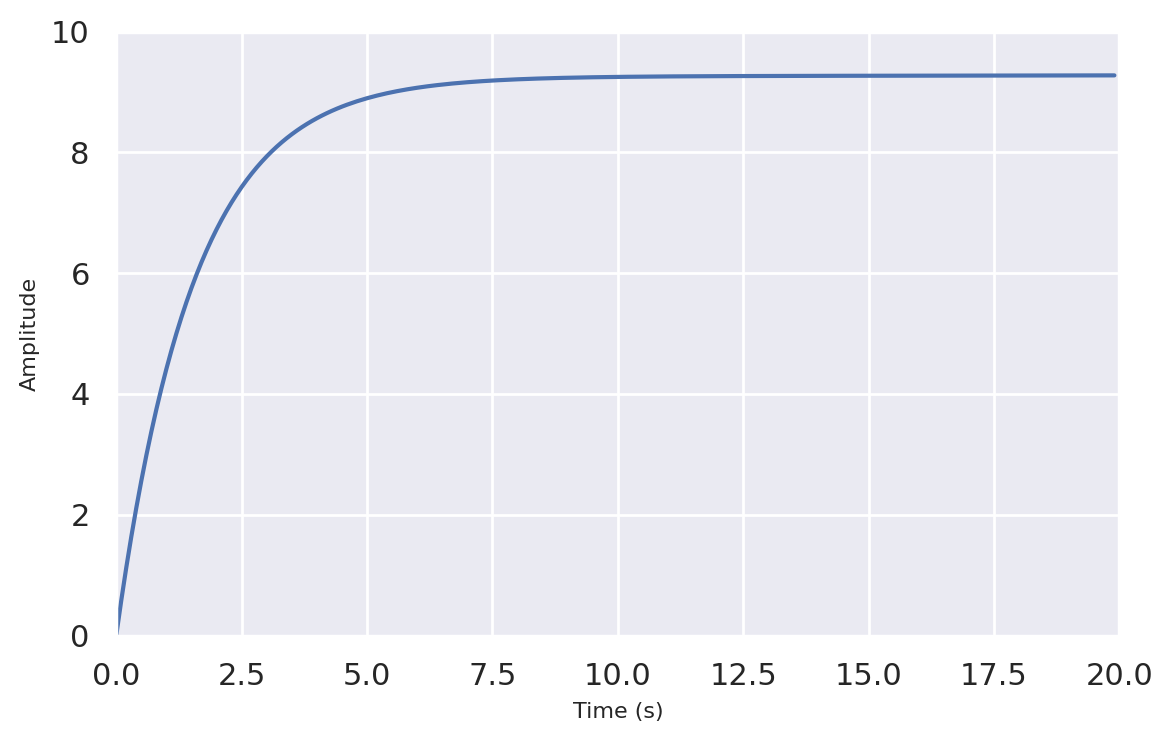

In [5]:
Kp = 600
Ki = 1;
C = Kp + Ki/s
T = control.feedback(C*P_cruise,1)
t = np.arange(0,20,0.1)
T, yout = control.step_response(sys=r*T, T=t)
plt.plot(T,yout)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axis([0, 20, 0, 10])
plt.grid('on')

Now adjust both the proportional gain, $K_p$, and the integral gain, $K_i$, to obtain the desired response. When you adjust the integral gain, $K_i$, we suggest you to start with a small value since a large $K_i$can de-stabilize the response. When $K_p$equals 800 and $K_i$equals 40, the step response will look like the following:

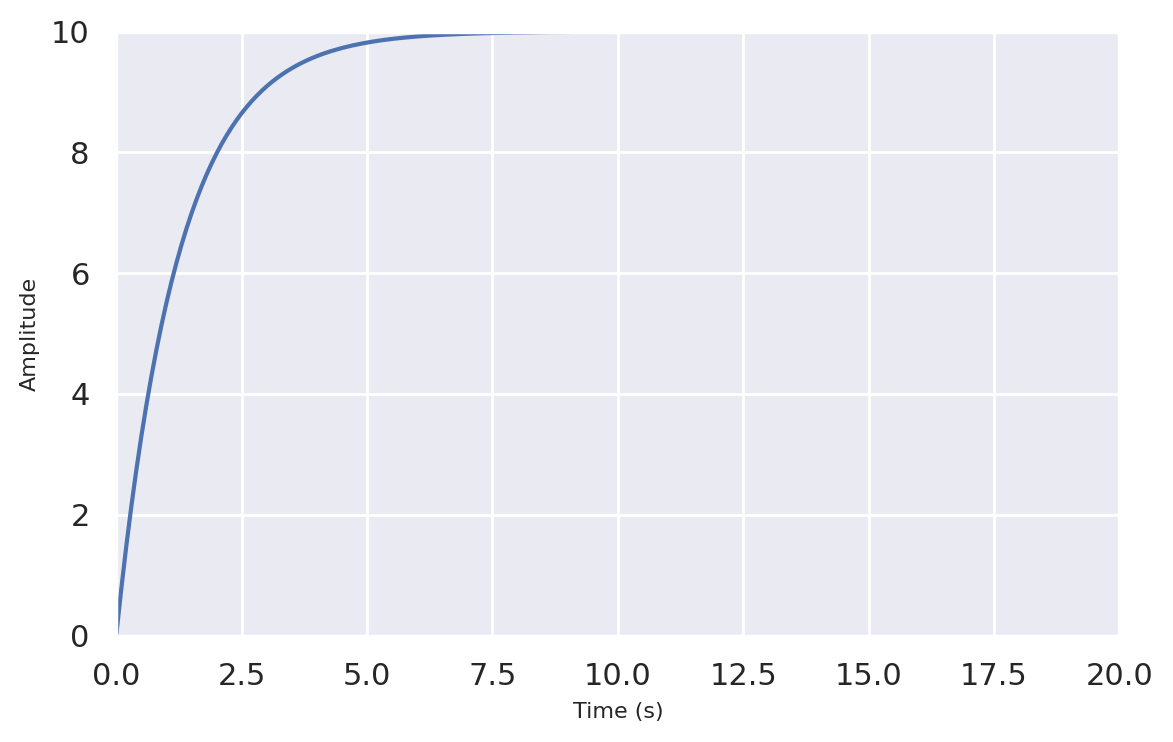

In [6]:
Kp = 800
Ki = 40
C = Kp + Ki/s
T = control.feedback(C*P_cruise,1)
t = np.arange(0,20,0.1)
T, yout = control.step_response(sys=r*T, T=t)
plt.plot(T,yout)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axis([0, 20, 0, 10])
plt.grid('on')

# Interactive PID control

For this particular example, no implementation of a derivative controller was needed to obtain the required output. However, you might want to see how to work with a PID control for the future reference. The closed-loop transfer function for this cruise control system with a PID controller ($C = K_p + K_i/s + K_d s$) is: 

$$
 T(s) = \frac{Y(s)}{R(s)} = \frac{P(s)C(s)}{1+P(s)C(s)} = \frac{K_d s^2 + K_p s + K_i}{(m + K_d) s^2 +(b+K_p)s + K_i} 
$$

Adjust all of $K_p$, $K_d$, and $K_i$ until you obtain satisfactory results. We will leave this as an exercise for you to work on.

Suggestion: Usually choosing appropriate gains requires a trial and error process. The best way to attack this tedious process is to adjust one variable ($K_p$, $K_i$, or $K_d$) at a time and observe how changing one variable influences the system output. The characteristics of $K_p$, $K_i$, and $K_d$ are summarized in the Introduction: PID Controller Design page. 

In [7]:
import ipywidgets as widgets

In [8]:
Kp_widget = widgets.BoundedIntText(
    value=1,
    min=0,
    max=1000,
    step=1,
    description="$K_p$:",
    disabled=False,
)
Ki_widget = widgets.BoundedIntText(
    value=1,
    min=0,
    max=1000,
    step=1,
    description="$K_i$:",
    disabled=False,
)
Kd_widget = widgets.BoundedIntText(
    value=1,
    min=0,
    max=1000,
    step=1,
    description="$K_d$:",
    disabled=False,
)


def plot_step(Kp, Ki, Kd):
    C = Kp + Ki / s + Kd * s
    PID_control = control.feedback(C * P_cruise, 1)
    T, yout = control.step_response(sys=r*PID_control, T=np.arange(0, 20, 0.01))
    plt.plot(T, yout)
    plt.xlabel("Time (s)")
    plt.ylabel("Response")
    plt.title("PID Controller Step Response")
    plt.axis([0, 20, 0, 10])
    plt.grid('on')


out = widgets.interactive_output(
    plot_step,
    {
        "Kp": Kp_widget,
        "Ki": Ki_widget,
        "Kd": Kd_widget,
    },
)

widgets.VBox([widgets.VBox([Kp_widget, Ki_widget, Kd_widget]), out])